# CallArgs EXPERT

Esta tabla contiene la información adicional de las sentencias de tipo Call (llamadas a funciones) EXPERT.  --> ABEL COMPLETAR <--

## 1 - Obtencion de datos

In [1]:
import matplotlib.pyplot as plt
from notebooks_utils import *

TARGET_FEATURE = 'callarg__expertise_level'
TARGET_CLASS = 'EXPERT'
full_table = get_data('callargs')

instances_for_class_low = len(full_table[full_table[TARGET_FEATURE] == "BEGINNER"])
instances_for_class_high = len(full_table[full_table[TARGET_FEATURE] == "EXPERT"])

print(f"The dataset contains {instances_for_class_low} ({instances_for_class_low/len(full_table)*100:.4}%) instances for BEGINNER class and {instances_for_class_high} ({instances_for_class_high/len(full_table)*100:.4}%) for EXPERT class.")

2024-05-15 15:17:35.699240 Data cache files found ...
2024-05-15 15:17:35.943358 Data cache files successfully loaded!!
The dataset contains 331228 (39.75%) instances for BEGINNER class and 501962 (60.25%) for EXPERT class.


In [11]:
full_table = full_table[full_table[TARGET_FEATURE] == TARGET_CLASS]

# Table name, features and target.
TABLE_NAME = 'callargs'
TABLE_FEATURES = ['callarg__number_args', 'callarg__named_args_pct', 'callarg__double_star_args_pct']

# Load features and target.
X = full_table[TABLE_FEATURES]

# Print information about the loaded table.
print(f'Features shape: {X.shape}')

print(f'As we can see the downloaded data contains a total of {X.shape[0]} instances. Each of the instances corresponds to a program. For each program we have {X.shape[1]} attributes.')

2024-05-15 15:16:27.889410 Data cache files found ...
2024-05-15 15:16:28.019418 Data cache files successfully loaded!!
Features shape: (833190, 4)
Target shape: (833190,)
As we can see the downloaded data contains a total of 833190 instances. Each of the instances corresponds to a program. For each program we have 4 attributes.


## 2 - Exploracion de datos

Una vez tenemos nuestra tabla en un dataframe el siguiente paso es explorarla para ver qué tipo de información contiene.

In [12]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 833190 entries, 0 to 833189
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   callarg__number_args           833190 non-null  int64  
 1   callarg__named_args_pct        833190 non-null  float64
 2   callarg__double_star_args_pct  833190 non-null  float64
 3   callarg__expertise_level       833190 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 25.4+ MB
None
<class 'pandas.core.series.Series'>
RangeIndex: 833190 entries, 0 to 833189
Series name: callarg__expertise_level
Non-Null Count   Dtype 
--------------   ----- 
833190 non-null  object
dtypes: object(1)
memory usage: 6.4+ MB
None


Cómo podemos ver la tabla está compuesta por 3 variables numéricas y 1 de tipo objeto.

### 2.1 - Duplicados
Miramos si la tabla tiene entradas duplicadas.

In [14]:
number_of_duplicated_entries = sum(full_table.duplicated(subset=TABLE_FEATURES))
duplicated_entries_pct = number_of_duplicated_entries / len(full_table) * 100
print(f"The dataset contains [{duplicated_entries_pct:.4}%] of duplicated entries.")

The dataset contains [99.97%] of duplicated entries.


### 2.3 - Valores Nulos 
Miramos si alguna de las variables que contiene la tabla contiene algún valor que sea nulo.

In [15]:
X.isnull().sum()

callarg__number_args             0
callarg__named_args_pct          0
callarg__double_star_args_pct    0
callarg__expertise_level         0
dtype: int64

In [16]:
print_empty_cols(X)

callarg__number_args
--------------------
0 instancias no tienen un valor para la columna callarg__number_args


callarg__named_args_pct
-----------------------
0 instancias no tienen un valor para la columna callarg__named_args_pct


callarg__double_star_args_pct
-----------------------------
0 instancias no tienen un valor para la columna callarg__double_star_args_pct


callarg__expertise_level
------------------------
0 instancias no tienen un valor para la columna callarg__expertise_level




### 2.4 - Describimos los valores de las variables de la tabla.

In [17]:
np.transpose(X.describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
callarg__number_args,833190.0,NaN,NaN,NaN,1.316269,1.197713,0.0,1.0,1.0,2.0,96.0
callarg__named_args_pct,833190.0,NaN,NaN,NaN,0.095029,0.267404,0.0,0.0,0.0,0.0,1.0
callarg__double_star_args_pct,833190.0,NaN,NaN,NaN,0.000434,0.014084,0.0,0.0,0.0,0.0,1.0
callarg__expertise_level,833190,2,EXPERT,501962,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Vamos a discretizar las variables numericas, agrupando conjuntos de valores en categorias, para hacer un análisis de los datos. Para cada variable es necesaario ver la distribucion de lo valores para hacer los bins (categorias).

In [18]:
# DISCRETIZATION
X_copy = X.copy()

discretized_columns = {
    "callarg__number_args": [(0.0, 1.0), (1.0, 1.0), (1.0, 2.0), (2.0, inf)],  # min: 0.0 max: 96.0
    "callarg__named_args_pct": [(0.0, 0.0), (0.0, inf)],  # min: 0.0 max: 1.0
    "callarg__double_star_args_pct": [(0.0, 0.0), (0.0, inf)],  # min: 0.0 max: 1.0
}

discretize_columns(X_copy, discretized_columns)
    
# SINGLE FEATURE
print("--- SINGLE FEATURE ---")
print(get_statistics(X_copy, ['callarg__number_args'], 10))
print(get_statistics(X_copy, ['callarg__named_args_pct'], 10))
print(get_statistics(X_copy, ['callarg__double_star_args_pct'], 10))


# 2 FEATURES
print("--- TWO FEATURES ---")
#print(get_statistics(X_copy, ['module__function_defs_pct', 'module__number_of_classes'], 10))

# 3 FEATURES
print("--- THREE FEATURES ---")
#print(get_statistics(X_copy, ['module__class_defs_pct', 'module__function_defs_pct', 'module__enum_defs_pct'], 10))

--- SINGLE FEATURE ---
callarg__number_args  count  percentage
           [1.0_1.0] 436642   52.406054
           [2.0_inf] 249449   29.939030
           [0.0_1.0) 147099   17.654917

callarg__named_args_pct  count  percentage
              [0.0_0.0] 729111   87.508371
              [0.0_inf] 104079   12.491629

callarg__double_star_args_pct  count  percentage
                    [0.0_0.0] 832250   99.887181
                    [0.0_inf]    940    0.112819

--- TWO FEATURES ---
--- THREE FEATURES ---


In [19]:
def normalize_datatypes(X:pd.DataFrame) -> (pd.DataFrame, [str]):
    X = pd.get_dummies(X)
    X = X.astype('float32')        
    columns_names = X.columns.tolist()
    return X, columns_names

X, TABLE_FEATURES = normalize_datatypes(X)
# Print information about the loaded table
print(f'Features shape: {X.shape}')

Features shape: (833190, 5)
Target shape: (833190,)


#### Muestra la matriz de correlación de pearson entre las variables de la tabla.

<Axes: >

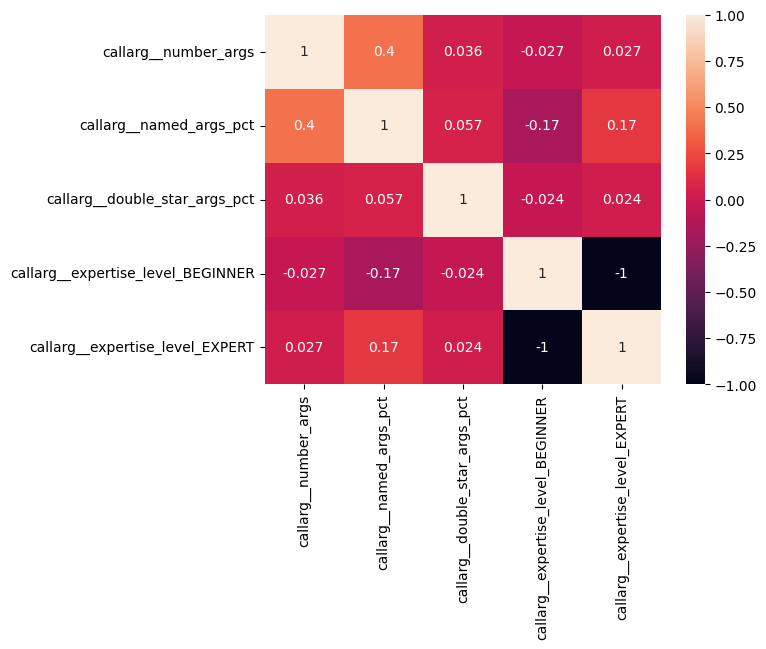

In [20]:
sns.heatmap(X.corr(), annot=True)

## 3 - Detección de valores atípicos (outliers)
Una vez sabemos qué datos contiene la tabla, analizaremos los valores que toma cada una de las variables de cada instancia. El objetivo es identificar posibles valores atípicos que nos dificulten la realización de futuras tareas. 
Tras su análisis, se puede concluir que un valor:
    - **Es erróneo**. En este caso hay que tomar una decisión para cada caso, siendo los tratamientos más extendidos son listwise, pairwise, drop variables, mean/median imputation, most frequent, separate category, zero imputation, cold deck, hot deck,(stochastic) regression, k-NN and multiple imputation. Los resultados de imputación regresiva, k-NN y múltiple dan buenos resultados, aunque, como se ha indicado, es necesario el estudio en cada caso.
    - **Es correcto, pero anómalo**. Se documenta su existencia para su posible discusión y se mantiene en el dataset. En estos casos se hace necesaria la utilización de algoritmos y estadísticos que no sean muy sensibles a dichos valores anómalos.

## Univariate
Para cada uno de los atributos se debe realizar un análisis y detección de valores atípicos, estudiando su posible causa. 
Existen diversas formas de calcular los valores anómalos. 

### Variables numéricas
Para las variables numéricas, se suele identificar: 
    - a) Valor atípico leve es el que está fuera de $[Q1 - 1.5IQR, Q3 + 1.5IQR]$, donde $IQR = Q3-Q1$.
    - b) Valor atípico extremo está fuera de $[Q1 - 3IQR, Q3 + 3IQR]$.

La idea es probar con a) y si hay pocas instancias analizarlas. Si hubiese muchas, mirar b) y analizar si fuesen pocas. No hay un algoritmo o método estipulado, puesto que depende del dominio del problema y de los datos.

Los límites de Tukey se basan en los cuartiles de los datos y son sensibles a la presencia de sesgo en la distribución. Cuando hay asimetría en los datos, los límites de Tukey pueden no ser tan efectivos para identificar outliers de manera equitativa en ambos extremos de la distribución. El Coeficiente de Medcouple es útil para identificar la asimetría en los datos, especialmente en presencia de valores atípicos o sesgados. Es una medida robusta porque no se ve tan afectada por valores extremos como la media y la desviación estándar. El MC puede proporcionar información adicional sobre la asimetría de la distribución, lo que te permite ajustar los límites de Tukey de manera más apropiada para tu conjunto de datos específico. Una posible variacion de los límites de Tukey teniendo en cuenta MC podria ser: 
   - Si MC es mayor que 0 (asimetría hacia la derecha):
      - low = (q1-1.5 * math.exp(-4*mc) * iqr)
      - high = (q3+1.5 * math.exp(3.5*mc) * iqr)
   - Si la asimetriza es hacia la izquierda:    
      - low = (q1-1.5 * math.exp(-3.5*mc) * iqr)
      - high = (q3+1.5 * math.exp(4*mc) * iqr)


### Variables categóricas
Para las variables categóricas no existe el concepto de valor anómalo, pero sí se puede considerar en base a un análisis de frecuencia. Por ejemplo, que el uso de una categoría sea residual, pudiendo tener un 0.1% de instancias en el dataset. Para detectar estos valores, se puede fijar un valor mínimo de frecuencia en función del número posible de valores de la variable categórica (2 en el caso de una variable booleana). Por ejemplo, un umbral de $\frac{0.2\%}{valores}$ (0.1% en el caso de una variable booleana)

## Analisis detallado de variables
Para cada una de las 3 variable (1 numerica y 2 porcentuales) se hara un analisis detallado 

### Variable number_args (1/3)
Esta variable representa el número de argumentos de la llamada. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 96. Con una media de 1.316.

In [ ]:
sns.stripplot(X['callarg__number_args'])

In [ ]:
print_outliers_for_df_column(X, 'callarg__number_args')

In [ ]:
X[X['callarg__number_args'] > 59].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

### Variable named_args_pct (2/3)
Esta variable representa la proporción de los args que son pasados por nombre. Toma los valores de 0.0 - 1.0. La media es 0.095.

In [ ]:
sns.displot(X['callarg__named_args_pct'], bins=[i / 100 for i in range(0, 101)])

In [ ]:
print_outliers_for_df_column(X, 'callarg__named_args_pct')

In [ ]:
X[X['callarg__named_args_pct'] > 0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

### Variable double_star_args_pct (8/13)
Esta variable representa la proporción de args que son double star (**). Toma los valores de 0.0 - 1.0. La media es 0.000434.

In [ ]:
sns.displot(X['callarg__double_star_args_pct'], bins=[i / 100 for i in range(0, 101)])

In [ ]:
print_outliers_for_df_column(X, 'callarg__double_star_args_pct')

In [ ]:
X[X['callarg__double_star_args_pct'] > 0.0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])